<a href="https://colab.research.google.com/github/dinarrahman30/Machine-Learning-Terapan/blob/main/Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Informasi Data Diri
Nama: Dinar Wahyu Rahman

Username Dicoding: dinar_wahyu

Email: dinarrahman30@gmail.com

LinkedIn: [Dinar Wahyu Rahman]('https:www.linkedin.com/in/dinar-wahyu-rahman/')

# Recommender System (Sistem Rekomendasi)
Proyek akhir pada kelas Machine Learning Terapan by Dicoding Academy

## 1. Deskripsi Proyek Sistem Rekomendasi Destinasi Wisata di Kota Yogyakarta dengan Collaborative Filtering

![Foto](https://opinijogja.com/wp-content/uploads/2023/02/Wisata.jpg)

Pariwisata menjadi salah satu bidang andalan perekonomian negara Indonesia. Kota Yogyakarta adalah salah satu destinasi wisata terpopuler di Indonesia, menawarkan berbagai jenis tempat wisata mulai dari wisata budaya, sejarah, alam, hingga kuliner. Dengan banyaknya pilihan, wisatawan sering menghadapi kesulitan dalam menentukan destinasi yang sesuai dengan minat mereka. Selain itu, platform pariwisata sering kali memberikan rekomendasi generik yang kurang relevan dengan preferensi individu.

Untuk mengatasi masalah ini, sistem rekomendasi destinasi wisata berbasis Collaborative Filtering dirancang untuk memberikan rekomendasi yang personal dan sesuai dengan preferensi pengguna, khususnya bagi wisatawan yang berkunjung ke Kota Yogyakarta.

### 1.1. Import library yang dibutuhkan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 1.2. Data Collection

Dataset diambil dari situs [Kaggle](https://www.kaggle.com/aprabowo/indonesia-tourism-destination)

In [3]:
!pip install kaggle

In [4]:
!kaggle datasets download -d aprabowo/indonesia-tourism-destination

Dataset URL: https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination
License(s): copyright-authors
  0% 0.00/158k [00:00<?, ?B/s]
100% 158k/158k [00:00<00:00, 72.7MB/s]


In [5]:
!unzip /content/indonesia-tourism-destination.zip

Archive:  /content/indonesia-tourism-destination.zip
  inflating: package_tourism.csv     
  inflating: tourism_rating.csv      
  inflating: tourism_with_id.csv     
  inflating: user.csv                


Dalam dataset terdapat 4 buah file bertipe csv (Comma-Seperated Values), yaitu
- `tourism_with_id.csv`: mengandung informasi tempak wisata di 5 kota besar di Indonesia (hanya kota Yogyakarta yang dipakai).
- `user.csv`: mengandung informasi pengguna untuk membuat rekomendasi fitur berdasar pengguna.
- `tourism_rating.csv`: mengandung informasi pengguna, tempat wisata, dan rating untuk membuat sistem rekomendasi berdasar rating.
- `package_tourism.csv`: berisi rekomendasi tempat terdekat berdasarkan waktu, biaya, dan peringkat.


## 2. Data Understanding

In [6]:
df_rating = pd.read_csv("/content/tourism_rating.csv")
df_tourism = pd.read_csv("/content/tourism_with_id.csv")
df_user = pd.read_csv("/content/user.csv")
df_package = pd.read_csv("/content/package_tourism.csv")

print(df_rating.head())
print("-" * 50)
print(df_tourism.head())
print("-" * 50)
print(df_user.head())
print("-" * 50)
print(df_package.head())

   User_Id  Place_Id  Place_Ratings
0        1       179              3
1        1       344              2
2        1         5              5
3        1       373              3
4        1       101              4
--------------------------------------------------
   Place_Id                         Place_Name  \
0         1                   Monumen Nasional   
1         2                           Kota Tua   
2         3                      Dunia Fantasi   
3         4  Taman Mini Indonesia Indah (TMII)   
4         5           Atlantis Water Adventure   

                                         Description       Category     City  \
0  Monumen Nasional atau yang populer disingkat d...         Budaya  Jakarta   
1  Kota tua di Jakarta, yang juga bernama Kota Tu...         Budaya  Jakarta   
2  Dunia Fantasi atau disebut juga Dufan adalah t...  Taman Hiburan  Jakarta   
3  Taman Mini Indonesia Indah merupakan suatu kaw...  Taman Hiburan  Jakarta   
4  Atlantis Water Adventure atau

Untuk pemodelan machine learning pada kasus ini, kita hanya akan menggunakan file `tourism_with_id.csv`

#### 2.1. Exploratory Data Analytics (EDA)

In [7]:
print(df_tourism.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB
None


Dari output `.info()` dapat disimpulkan bahwa:
- `Place_Id`: ID dari setiap tempat wisata yang digunakan untuk membedakan tempat satu dengan lainnya.
- `Place_Name`: Nama tempat wisata
- `Description`: Deskripsi singkat tentang tempat wisata, mencakup informasi utama yang menarik perhatian wisatawan, seperti daya tarik utama atau sejarah singkat.
- `Category`: Kategori tempat wisata, seperti "Budaya", "Sejarah", "Alam", atau "Kuliner".
- `City`: Kota tempat wisata tersebut berada, misalnya "Yogyakarta".
- `Price`: Harga masuk atau biaya yang diperlukan untuk menikmati tempat wisata tersebut (dapat berupa nominal dalam mata uang tertentu).
- `Rating`: Penilaian rata-rata dari pengunjung, biasanya dalam skala tertentu (misalnya 1-5).
- `Time_Minutes`: Estimasi waktu yang diperlukan untuk menikmati atau mengunjungi tempat wisata tersebut (dalam satuan menit).
- `Coordinate`: Informasi lokasi dalam bentuk koordinat geografis yang mungkin mencakup kombinasi latitude (Lat) dan longitude (Long).
- `Lat`: Latitude, yaitu garis lintang yang menunjukkan lokasi tempat wisata di peta.
- `Long`: Longitude, yaitu garis bujur yang menunjukkan lokasi tempat wisata di peta.
- `Unnamed: 11`: Kolom yang berisi nilai NaN.
- `Unnamed; 12`: Kolom yang berisi angka.

In [8]:
print("Shape of df_tourism:", df_tourism.shape)

Shape of df_tourism: (437, 13)


Dari eksekusi method `.shape` Terlihat:

| Jumlah Baris	| Jumlah Kolom |
| ------ | ------ |
| 437 |	13 |

#### 2.1.1. Checking Missing Value

In [9]:
# Cek data duplicated
df_tourism.duplicated().sum()

0

In [10]:
# Cek missing value
df_tourism.isnull().sum()

,0
Place_Id,0
Place_Name,0
Description,0
Category,0
City,0
Price,0
Rating,0
Time_Minutes,232
Coordinate,0
Lat,0


In [11]:
# Drop kolom yang tidak akan digunakan
df_copy_tourism = df_tourism.copy()
df_copy_tourism.drop(columns=['Unnamed: 11', 'Unnamed: 12', 'Time_Minutes', 'Coordinate', 'Lat', 'Long'], inplace=True)
print('Done')

Done


In [12]:
# Memfilter hanya kota Yogyakarta yang ditampilkan
df_copy_tourism = df_copy_tourism[df_copy_tourism['City'] == 'Yogyakarta']
df_copy_tourism.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating
84,85,Taman Pintar Yogyakarta,Taman Pintar Yogyakarta (bahasa Jawa: Hanacara...,Taman Hiburan,Yogyakarta,6000,4.5
85,86,Keraton Yogyakarta,Keraton Ngayogyakarta Hadiningrat atau Keraton...,Budaya,Yogyakarta,15000,4.6
86,87,Sindu Kusuma Edupark (SKE),Sindu Kusuma Edupark (SKE) merupakan sebuah de...,Taman Hiburan,Yogyakarta,20000,4.2
87,88,Museum Benteng Vredeburg Yogyakarta,Museum Benteng Vredeburg (bahasa Jawa: ꦩꦸꦱꦶꦪꦸꦩ...,Budaya,Yogyakarta,3000,4.6
88,89,De Mata Museum Jogja,Museum De Mata merupakan salah satu museum yan...,Budaya,Yogyakarta,50000,4.4


In [32]:
# menghitung ada berapa tempat wisata dengan harga tiket masuk yang sama
df_copy_tourism['Price'].value_counts()

,count
Price,
10000,26
0,25
5000,23
3000,8
15000,6
2500,5
20000,5
50000,5
2000,3


Kesimpulan dari sesi `Data Understanding`, didapat,
- Dataset memiliki 437 sample dengan jumlah kolom sebanyak 13.
- Terdapat fitur `Time_Minutes` dengan missing value sebanyak 232 dan kolom `Unnamed: 11` sebanyak 437.
- Tidak terdapat data yang duplikat.
- Namun, kita mendrop beberapa fitur yang tidak terpakai yaitu `Time_Minutes`, `Unnamed: 11`, dan `Unnamed: 12`.
- Memfilter data dalam DataFrame `df_copy_tourism` sehingga hanya menampilkan baris-baris yang memiliki nilai kolom `City` sama dengan 'Yogyakarta'
- Dataset memiliki 3 fitur `int64`, 5 `object`, dan 5 `float64`.

#### 2.1.2 Visualisasi Data

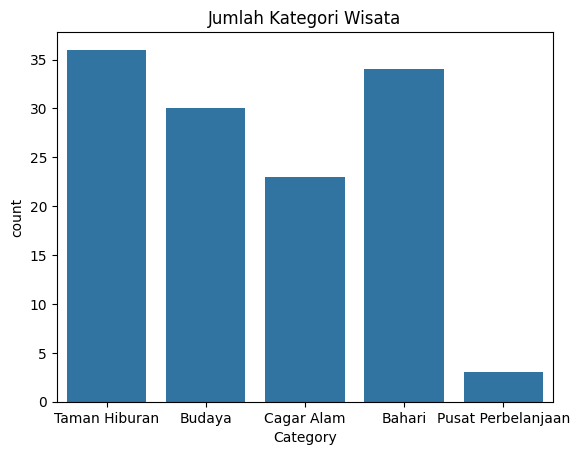

In [13]:
# Membuat visualisasi jumlah kategori wisata

sns.countplot(x='Category', data=df_copy_tourism)
plt.title('Jumlah Kategori Wisata')
plt.show()

Text(0.5, 0, 'Rating')

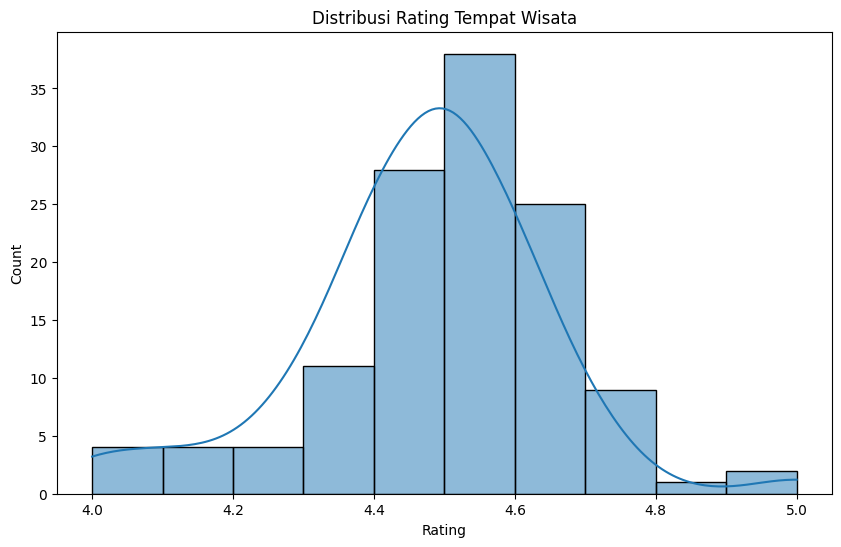

In [14]:
# Visualisasi rating tempat wisata

plt.figure(figsize=(10, 6))
sns.histplot(df_copy_tourism['Rating'], bins=10, kde=True)
plt.title('Distribusi Rating Tempat Wisata')
plt.xlabel('Rating')

## 3. Data Preparation

#### 3.2. Train-Test-Split

In [16]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Select relevant features
data_model = df_copy_tourism[['Place_Name','City', 'Price','Rating', 'Category','Description']].copy()  # create a copy to avoid SettingWithCopyWarning

# Rescale the ratings to be between 1 and 5
data_model['Rating'] = data_model['Rating'].apply(lambda x: round(x/2) if x <= 10 else 5)

# Handle duplicates and missing data
data_model.drop_duplicates(inplace=True)
data_model.dropna(inplace=True)

# Split into features and target
X = df_copy_tourism[['City','Price']]
y = df_copy_tourism['Rating']


# Convert City to one-hot encoding
X = pd.get_dummies(X, columns=['City'])

# Convert y to categorical
y = tf.keras.utils.to_categorical(y-1, num_classes=5)

# Split into train, test, and validation sets (50% train, 20% validation, 30% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=(0.2/0.7), random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## 4. Model Development

In [17]:
# Build the neural network model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation='softmax'))  # 5 classes

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 554ms/step - accuracy: 0.9892 - loss: 1.5727 - val_accuracy: 1.0000 - val_loss: 1.5759
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 0.9788 - loss: 1.5618 - val_accuracy: 1.0000 - val_loss: 1.5648
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9892 - loss: 1.5562 - val_accuracy: 1.0000 - val_loss: 1.5540
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.9788 - loss: 1.5416 - val_accuracy: 1.0000 - val_loss: 1.5431
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.9788 - loss: 1.5290 - val_accuracy: 1.0000 - val_loss: 1.5316
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.9788 - loss: 1.5181 - val_accuracy: 1.0000 - val_loss: 1.5201
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - accuracy: 0.9892 - loss: 1.5039 - val_accuracy: 1.0000 - val_loss: 1.5083
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.9788 - loss: 1.4923 - val_accuracy: 1.0000 - va

## 5. Evaluation

In [18]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

print('Train Accuracy: ', max(history.history['accuracy']))
print('Validation Accuracy: ', max(history.history['val_accuracy']))
print('Train Loss: ', min(history.history['loss']))
print('Validation Loss: ', min(history.history['val_loss']))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9720 - loss: 0.1544
Train Accuracy:  0.9838709831237793
Validation Accuracy:  1.0
Train Loss:  0.10088348388671875
Validation Loss:  0.029483692720532417


#### 5.1. Plot Akurasi

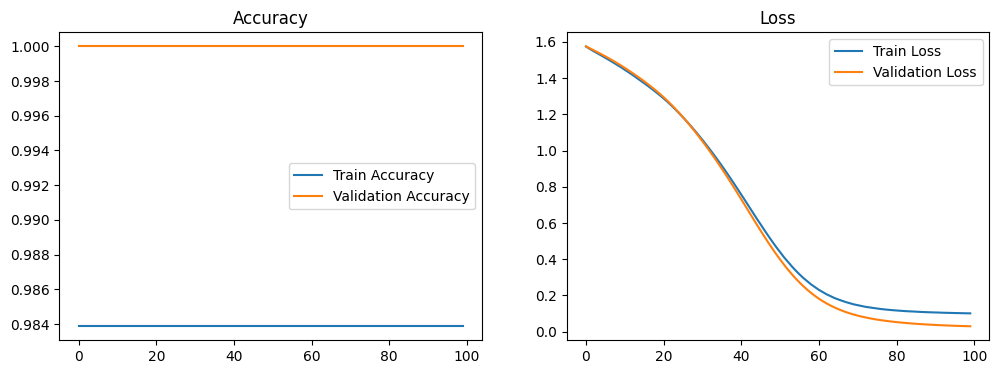

In [19]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

In [20]:
import pickle

data_model.to_hdf('wisata_yogya.h5', key='df', mode='w')
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [21]:
# Load and preprocess data
loadedModel = pd.read_hdf('wisata_yogya.h5', 'df')
with open('scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)
test_model = df_copy_tourism.copy()
test_model

,Place_Id,Place_Name,Description,Category,City,Price,Rating
84,85,Taman Pintar Yogyakarta,Taman Pintar Yogyakarta (bahasa Jawa: Hanacara...,Taman Hiburan,Yogyakarta,6000,4.5
85,86,Keraton Yogyakarta,Keraton Ngayogyakarta Hadiningrat atau Keraton...,Budaya,Yogyakarta,15000,4.6
86,87,Sindu Kusuma Edupark (SKE),Sindu Kusuma Edupark (SKE) merupakan sebuah de...,Taman Hiburan,Yogyakarta,20000,4.2
87,88,Museum Benteng Vredeburg Yogyakarta,Museum Benteng Vredeburg (bahasa Jawa: ꦩꦸꦱꦶꦪꦸꦩ...,Budaya,Yogyakarta,3000,4.6
88,89,De Mata Museum Jogja,Museum De Mata merupakan salah satu museum yan...,Budaya,Yogyakarta,50000,4.4
...,...,...,...,...,...,...,...
205,206,Wisata Kaliurang,"Jogja selalu menarik untuk dikulik, terlebih t...",Cagar Alam,Yogyakarta,8000,4.4
206,207,Heha Sky View,HeHa Sky View adalah salah satu tempat wisata ...,Taman Hiburan,Yogyakarta,15000,4.4
207,208,Taman Sungai Mudal,"Taman Sungai Mudal, sebuah objek wisata alam t...",Cagar Alam,Yogyakarta,10000,4.6
208,209,Pantai Sanglen,Pantai Sanglen. Lokasinya berada di Desa Kemad...,Bahari,Yogyakarta,10000,4.5


In [22]:
test_model = loadedModel[['Place_Name','City', 'Price','Rating', 'Category']]

In [23]:
# Handle duplicates and missing data
test_model.drop_duplicates(inplace=True)
test_model.dropna(inplace=True)

In [25]:
# Assuming you have already executed the code provided and have the necessary objects (model, scaler, etc.) loaded.

def recommend_places(city, price_range, num_recommendations=5):
    """
    Recommends tourist places based on city and price range.

    Args:
        city (str): The city to search in (e.g., "Yogyakarta").
        price_range (tuple): A tuple representing the minimum and maximum price (e.g., (10000, 50000)).
        num_recommendations (int): The number of recommendations to return.

    Returns:
        list: A list of recommended place names.
    """

    # Filter data based on city and price range
    filtered_places = loadedModel[
        (loadedModel["City"] == city) & (loadedModel["Price"] >= price_range[0]) & (loadedModel["Price"] <= price_range[1])
    ]

    if filtered_places.empty:
        return ["No recommendations found for the given criteria."]

    # Prepare input features for the model
    X_input = filtered_places[["City", "Price"]].copy()
    X_input = pd.get_dummies(X_input, columns=["City"])
    X_input = loaded_scaler.transform(X_input)

    # Predict ratings using the loaded model
    predictions = model.predict(X_input)

    # Get predicted ratings and corresponding place names
    predicted_ratings = np.argmax(predictions, axis=1) + 1  # Convert back to 1-5 scale
    place_names = filtered_places["Place_Name"].tolist()

    # Combine place names and predicted ratings
    places_with_ratings = list(zip(place_names, predicted_ratings))
    places_with_ratings.sort(key=lambda x: x[1], reverse=True)  # Sort by rating

    # Return top recommendations
    recommendations = [place[0] for place in places_with_ratings[:num_recommendations]]

    return recommendations

# Example Usage
city_choice = "Yogyakarta" #@param {type:"string"}
min_price =  1000#@param {type:"number"}
max_price =  50000#@param {type:"number"}


recommendations = recommend_places(city_choice, (min_price, max_price))
print("Recommended Places:")
for place in recommendations:
    print(place)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Recommended Places:
Taman Pintar Yogyakarta
Keraton Yogyakarta
Sindu Kusuma Edupark (SKE)
Museum Benteng Vredeburg Yogyakarta
De Mata Museum Jogja
